Kmeans
Hirarki
DBSCAN

# Preprocessing data

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import data
df = pd.read_csv('bctest.csv')
#  Tampilkan 5 data pertama
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,4/1/2020,506719,483006,509646,466526,-,4.85%
1,4/2/2020,520028,507419,546335,501415,-,2.63%
2,4/3/2020,513316,518893,535165,504449,-,-1.29%
3,4/4/2020,522421,513004,532522,507849,-,1.77%
4,4/5/2020,516266,522771,525260,509652,-,-1.18%


In [53]:
# hapus atribut yang tidak digunakan
df.drop(['Date','Vol.','Change %'], axis=1, inplace=True)

# tampilkan 5 data pertama
df.head()

,Price,Open,High,Low
0,506719,483006,509646,466526
1,520028,507419,546335,501415
2,513316,518893,535165,504449
3,522421,513004,532522,507849
4,516266,522771,525260,509652


In [54]:
from sklearn.preprocessing import StandardScaler

df_scale = df[['Price', 'Open', 'High', 'Low']]

# instantiating the scaler
scaler = StandardScaler()

# fit and transform
df_scale = scaler.fit_transform(df_scale)
df_scale.shape

(30, 4)

In [55]:
df_scale[:5]

array([[-1.14672582, -1.76139979, -1.26183302, -1.96073905],
       [-0.78954563, -1.05700876, -0.37183883, -0.93315085],
       [-0.96967888, -0.72594815, -0.64279838, -0.84379023],
       [-0.72532351, -0.89586413, -0.70691173, -0.74364979],
       [-0.89050828, -0.61405578, -0.88307183, -0.69054591]])

In [56]:
data = pd.DataFrame(df_scale)
data.columns = ['Price', 'Open', 'High', 'Low']

data_cluster = data.copy()
data.head()

,Price,Open,High,Low
0,-1.146726,-1.761400,-1.261833,-1.960739
1,-0.789546,-1.057009,-0.371839,-0.933151
2,-0.969679,-0.725948,-0.642798,-0.843790
3,-0.725324,-0.895864,-0.706912,-0.743650
4,-0.890508,-0.614056,-0.883072,-0.690546


In [57]:
data.describe()

,Price,Open,High,Low
count,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01
mean,1.480297e-17,8.733754e-16,7.549517e-16,8.733754e-16
std,1.017095e+00,1.017095e+00,1.017095e+00,1.017095e+00
min,-1.146726e+00,-1.761400e+00,-1.261833e+00,-1.960739e+00
25%,-7.373400e-01,-6.393816e-01,-6.742365e-01,-6.708344e-01
50%,-1.317318e-01,-8.484642e-02,-1.981773e-01,-3.039743e-01
75%,4.224490e-01,4.153511e-01,3.577507e-01,3.220065e-01
max,3.005464e+00,3.420388e+00,3.585942e+00,2.937042e+00


In [58]:
# data = df.copy()
# data_cluster = df.copy()

# K-means

Text(0, 0.5, 'Inertia')

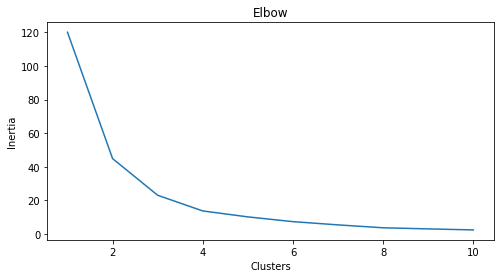

In [59]:
# Menentukan jumlah K
from sklearn.cluster import KMeans

# buat list inertia
clusters = []
for i in range (1,11):
    km = KMeans(n_clusters=i).fit(data)
    clusters.append(km.inertia_)

# tampilkan plot
fig, ax = plt.subplots(figsize=(8,4))
sns.lineplot(x=list(range(1,11)), y=clusters, ax=ax)
ax.set_title('Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

In [60]:
## Melatih model
# Create Model
model_kmeans3 = KMeans(n_clusters=3)
model_kmeans4 = KMeans(n_clusters=4)

# Train Model
model_kmeans3.fit(data)
model_kmeans4.fit(data)

# Menambah Label pada data
data_cluster['cluster_kmeans3'] = model_kmeans3.labels_
data_cluster['cluster_kmeans4'] = model_kmeans4.labels_

data_cluster

,Price,Open,High,Low,cluster_kmeans3,cluster_kmeans4
0,-1.146726,-1.761400,-1.261833,-1.960739,0,0
1,-0.789546,-1.057009,-0.371839,-0.933151,0,0
2,-0.969679,-0.725948,-0.642798,-0.843790,0,0
3,-0.725324,-0.895864,-0.706912,-0.743650,0,0
4,-0.890508,-0.614056,-0.883072,-0.690546,0,0
5,0.203415,-0.800707,-0.112474,-0.500633,0,3
6,-0.124056,0.376443,0.099660,0.099975,2,3
7,0.251481,0.017019,0.031690,0.241025,2,3
8,0.175477,0.428321,-0.022041,0.349000,2,3
9,-0.768344,0.339395,-0.126544,-0.611700,0,3


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


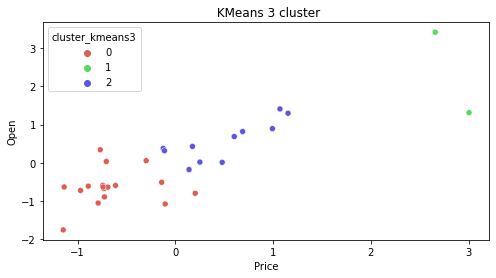

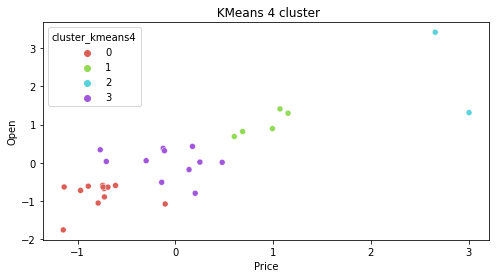

In [61]:
## Tampilkan Plot
plt.figure(figsize=(8,4))
sns.scatterplot(data_cluster['Price'], data_cluster['Open'], hue=data_cluster['cluster_kmeans3'], palette=sns.color_palette('hls',3))
plt.title(' KMeans 3 cluster')

plt.figure(figsize=(8,4))
sns.scatterplot(data_cluster['Price'], data_cluster['Open'], hue=data_cluster['cluster_kmeans4'], palette=sns.color_palette('hls',4))
plt.title(' KMeans 4 cluster')
plt.show()

# Hierarchy

In [62]:
data

,Price,Open,High,Low
0,-1.146726,-1.761400,-1.261833,-1.960739
1,-0.789546,-1.057009,-0.371839,-0.933151
2,-0.969679,-0.725948,-0.642798,-0.843790
3,-0.725324,-0.895864,-0.706912,-0.743650
4,-0.890508,-0.614056,-0.883072,-0.690546
5,0.203415,-0.800707,-0.112474,-0.500633
6,-0.124056,0.376443,0.099660,0.099975
7,0.251481,0.017019,0.031690,0.241025
8,0.175477,0.428321,-0.022041,0.349000
9,-0.768344,0.339395,-0.126544,-0.611700


In [63]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [64]:
## Single Linkage

# In single linkage hierarchical clustering, 
# the distance between two clusters is defined as 
# the shortest distance between two points in each cluster. 
# For example, the distance between clusters “r” and “s” to
# the left is equal to the length of the arrow between their two closest points.

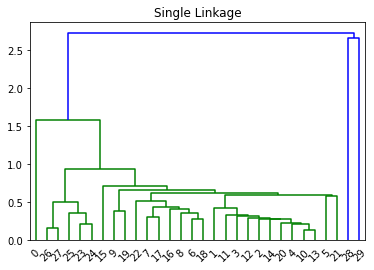

In [65]:
# single linkage
mergings_single = linkage(data, method="single", metric='euclidean')
dendrogram(mergings_single)
plt.title("Single Linkage")
plt.show()

In [66]:
## Complete Linkage

# In complete linkage hierarchical clustering, 
# the distance between two clusters is defined as 
# the longest distance between two points in each cluster. 
# For example, the distance between clusters “r” and “s” to the 
# left is equal to the length of the arrow between their two furthest points. 

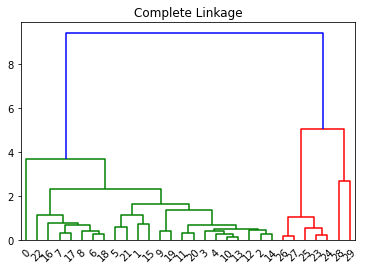

In [67]:
# complete linkage
mergings_complete = linkage(data, method="complete", metric='euclidean')
dendrogram(mergings_complete)
plt.title("Complete Linkage")
plt.show()

In [68]:
# 3 clusters
cluster_hierarchy = cut_tree(mergings_complete, n_clusters=3).reshape(-1, )
cluster_hierarchy

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 2, 2])

In [69]:
# assign cluster labels
data_cluster['cluster_hierarchy'] = cluster_hierarchy
data_cluster

,Price,Open,High,Low,cluster_kmeans3,cluster_kmeans4,cluster_hierarchy
0,-1.146726,-1.761400,-1.261833,-1.960739,0,0,0
1,-0.789546,-1.057009,-0.371839,-0.933151,0,0,0
2,-0.969679,-0.725948,-0.642798,-0.843790,0,0,0
3,-0.725324,-0.895864,-0.706912,-0.743650,0,0,0
4,-0.890508,-0.614056,-0.883072,-0.690546,0,0,0
5,0.203415,-0.800707,-0.112474,-0.500633,0,3,0
6,-0.124056,0.376443,0.099660,0.099975,2,3,0
7,0.251481,0.017019,0.031690,0.241025,2,3,0
8,0.175477,0.428321,-0.022041,0.349000,2,3,0
9,-0.768344,0.339395,-0.126544,-0.611700,0,3,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, ' Hierarchical Clustering')

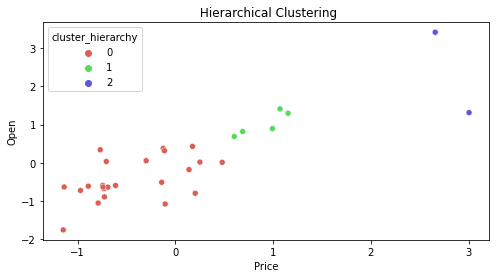

In [70]:
## Tampilkan Plot
plt.figure(figsize=(8,4))
sns.scatterplot(data_cluster['Price'], data_cluster['Open'], hue=data_cluster['cluster_hierarchy'], palette=sns.color_palette('hls',3))
plt.title(' Hierarchical Clustering')

# DBSCAN

In [71]:
from sklearn.cluster import DBSCAN

In [72]:
data

,Price,Open,High,Low
0,-1.146726,-1.761400,-1.261833,-1.960739
1,-0.789546,-1.057009,-0.371839,-0.933151
2,-0.969679,-0.725948,-0.642798,-0.843790
3,-0.725324,-0.895864,-0.706912,-0.743650
4,-0.890508,-0.614056,-0.883072,-0.690546
5,0.203415,-0.800707,-0.112474,-0.500633
6,-0.124056,0.376443,0.099660,0.099975
7,0.251481,0.017019,0.031690,0.241025
8,0.175477,0.428321,-0.022041,0.349000
9,-0.768344,0.339395,-0.126544,-0.611700


In [73]:
# create an object
db = DBSCAN(eps=0.7, min_samples=5, metric='euclidean')

# fit the model
db.fit(data)

DBSCAN(algorithm='auto', eps=0.7, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [74]:
# assign cluster labels
data_cluster['cluster_dbscan'] = db.labels_
data_cluster

,Price,Open,High,Low,cluster_kmeans3,cluster_kmeans4,cluster_hierarchy,cluster_dbscan
0,-1.146726,-1.761400,-1.261833,-1.960739,0,0,0,-1
1,-0.789546,-1.057009,-0.371839,-0.933151,0,0,0,0
2,-0.969679,-0.725948,-0.642798,-0.843790,0,0,0,0
3,-0.725324,-0.895864,-0.706912,-0.743650,0,0,0,0
4,-0.890508,-0.614056,-0.883072,-0.690546,0,0,0,0
5,0.203415,-0.800707,-0.112474,-0.500633,0,3,0,0
6,-0.124056,0.376443,0.099660,0.099975,2,3,0,0
7,0.251481,0.017019,0.031690,0.241025,2,3,0,0
8,0.175477,0.428321,-0.022041,0.349000,2,3,0,0
9,-0.768344,0.339395,-0.126544,-0.611700,0,3,0,-1


In [75]:
data_cluster.describe()

,Price,Open,High,Low,cluster_kmeans3,cluster_kmeans4,cluster_hierarchy,cluster_dbscan
count,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,30.000000,30.000000,30.000000,30.00000
mean,1.480297e-17,8.733754e-16,7.549517e-16,8.733754e-16,0.800000,1.400000,0.300000,0.00000
std,1.017095e+00,1.017095e+00,1.017095e+00,1.017095e+00,0.961321,1.354431,0.595963,0.58722
min,-1.146726e+00,-1.761400e+00,-1.261833e+00,-1.960739e+00,0.000000,0.000000,0.000000,-1.00000
25%,-7.373400e-01,-6.393816e-01,-6.742365e-01,-6.708344e-01,0.000000,0.000000,0.000000,0.00000
50%,-1.317318e-01,-8.484642e-02,-1.981773e-01,-3.039743e-01,0.000000,1.000000,0.000000,0.00000
75%,4.224490e-01,4.153511e-01,3.577507e-01,3.220065e-01,2.000000,3.000000,0.000000,0.00000
max,3.005464e+00,3.420388e+00,3.585942e+00,2.937042e+00,2.000000,3.000000,2.000000,1.00000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, ' DBSCAN clustering')

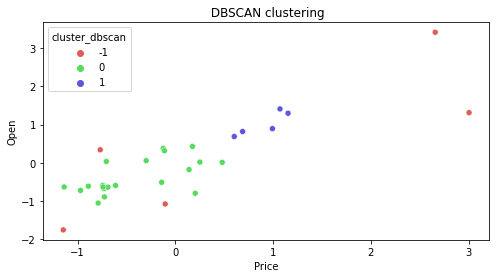

In [76]:
## Tampilkan Plot
plt.figure(figsize=(8,4))
sns.scatterplot(data_cluster['Price'], data_cluster['Open'], hue=data_cluster['cluster_dbscan'], palette=sns.color_palette('hls',3))
plt.title(' DBSCAN clustering')

# K-MEDOIDS

In [79]:
!pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids

In [80]:
model_kmedoids = KMedoids(n_clusters=4, random_state=0)
model_kmedoids.fit(data)

data_cluster['Cluster K-Medoids'] = model_kmedoids.labels_
data_cluster

,Price,Open,High,Low,cluster_kmeans3,cluster_kmeans4,cluster_hierarchy,cluster_dbscan,Cluster K-Medoids
0,-1.146726,-1.761400,-1.261833,-1.960739,0,0,0,-1,0
1,-0.789546,-1.057009,-0.371839,-0.933151,0,0,0,0,0
2,-0.969679,-0.725948,-0.642798,-0.843790,0,0,0,0,0
3,-0.725324,-0.895864,-0.706912,-0.743650,0,0,0,0,0
4,-0.890508,-0.614056,-0.883072,-0.690546,0,0,0,0,0
5,0.203415,-0.800707,-0.112474,-0.500633,0,3,0,0,2
6,-0.124056,0.376443,0.099660,0.099975,2,3,0,0,2
7,0.251481,0.017019,0.031690,0.241025,2,3,0,0,2
8,0.175477,0.428321,-0.022041,0.349000,2,3,0,0,2
9,-0.768344,0.339395,-0.126544,-0.611700,0,3,0,-1,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


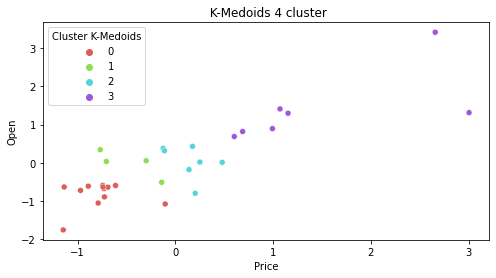

In [81]:
plt.figure(figsize=(8,4))
sns.scatterplot(data_cluster['Price'], data_cluster['Open'], hue=data_cluster['Cluster K-Medoids'], palette=sns.color_palette('hls',4))
plt.title(' K-Medoids 4 cluster')
plt.show()